# Exporting Data

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_MpHjUjU.csv')

In [202]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df['Date'] = df['MMM-YY']

In [4]:
df.dtypes

MMM-YY                  datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Designation                      int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [140]:
df['Attrition'] = 1
df.loc[df.LastWorkingDate.isnull(), 'Attrition'] = 0
df['total_Months'] = 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Education_Level'] = df['Education_Level'].map({'Master': 3, 'Bachelor': 2,'College':1})

In [141]:
u_id = list(set(df.Emp_ID))

# Data Cleaning

In [142]:
def countMonths(Time1,Time2):
    Time1 = Time1.to_numpy()
    Time2 = Time2.to_numpy()
    if (str(Time2) == 'NaT'):
        Time2 = np.datetime64('2017-12-31')
    #print(type(Time2),Time2, str(Time2))
    x = Time2-Time1
    months = x.astype('timedelta64[M]')
    tMonths = months / np.timedelta64(1, 'M')
    #print('Months: ',tMonths)
    if tMonths == np.nan:
        return 0
    return tMonths

In [184]:
new_Attriubes = []
for i in u_id:
    empf = df[(df['Emp_ID'] == i)]
    new_values = { 's_Emp_ID' : empf.Emp_ID.iloc[-1],
    's_Age' : empf.Age.iloc[-1],
    's_Gender' : empf.Gender.iloc[-1],
    's_City' : empf.City.iloc[-1],
    's_Salary': empf.Salary.mean(),
    's_Education_Level': empf['Education_Level'].iloc[-1],
    's_Joining_Designation' : empf['Joining Designation'].iloc[-1],
    's_Designation' : empf['Designation'].iloc[-1],
    's_promotion':empf['Designation'].iloc[-1] - empf['Joining Designation'].iloc[-1],
    's_Total_Bussiness' : empf['Total Business Value'].sum(),
    's_Q_rating' : empf['Quarterly Rating'].mean(),
    #'s_joinDate' : empf['Dateofjoining'].iloc[-1],
    #'s_LastWorkingDate': empf['LastWorkingDate'].iloc[-1],            
    's_Total_Working' : countMonths(empf['Dateofjoining'].iloc[-1] , empf['LastWorkingDate'].iloc[-1]),
    #'s_Total_Working' : empf['Emp_ID'].count(),
    's_Attrition' : empf['Attrition'].iloc[-1] }
    new_Attriubes.append(new_values)    

In [185]:
ed = pd.DataFrame(new_Attriubes)

In [186]:
ed.tail(20)

,s_Emp_ID,s_Age,s_Gender,s_City,s_Salary,s_Education_Level,s_Joining_Designation,s_Designation,s_promotion,s_Total_Bussiness,s_Q_rating,s_Total_Working,s_Attrition
2361,2764,30,0,C25,42199.0,1,2,2,0,309180,1.000000,3.0,0
2362,2765,26,1,C18,38809.0,2,1,1,0,0,1.000000,4.0,1
2363,2766,37,0,C21,53793.0,2,2,3,1,25164110,2.875000,84.0,1
2364,2768,30,0,C1,80138.0,3,1,2,1,2565930,1.500000,36.0,1
2365,2770,32,1,C26,49295.0,1,3,3,0,0,1.000000,1.0,0
2366,2771,41,1,C12,91456.0,1,2,4,2,19597020,2.000000,64.0,0
2367,2772,23,0,C26,51670.0,1,1,2,1,1784850,1.600000,22.0,1
2368,2773,36,1,C19,35607.0,1,1,1,0,563400,1.375000,6.0,1
2369,2774,41,1,C15,42313.0,2,1,1,0,4284010,2.714286,11.0,1
2370,2775,27,1,C9,85112.0,1,3,3,0,0,1.000000,2.0,0


In [416]:
#ed['Attrition'] = ed['s_Attrition']
#del ed['s_Attrition']

# EDA

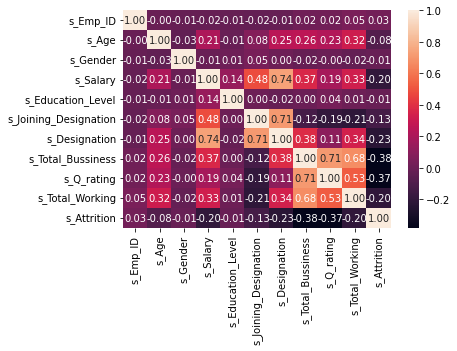

In [146]:
sns.heatmap(ed.corr(), annot=True, fmt=".2f")
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Attrition'>

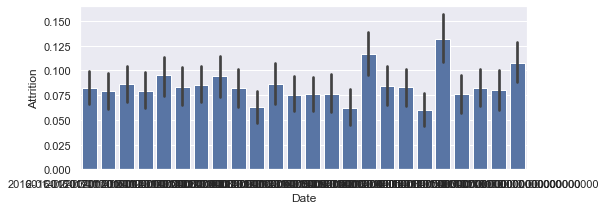

In [208]:
sns.set_color_codes("muted")
sns.set(rc={'figure.figsize':(8,3)})
sns.barplot(x=df.Date, y=df.Attrition, data=df,
            label="Age-Attrition", color="b")

<AxesSubplot:xlabel='s_Education_Level', ylabel='s_Attrition'>

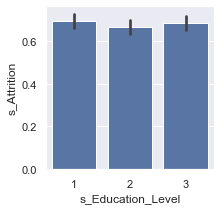

In [206]:
sns.set_color_codes("muted")
sns.set(rc={'figure.figsize':(3,3)})
sns.barplot(x=ed.s_Education_Level, y=ed.s_Attrition, data=ed,
            label="Age-Attrition", color="b")

<AxesSubplot:xlabel='s_Age', ylabel='s_Attrition'>

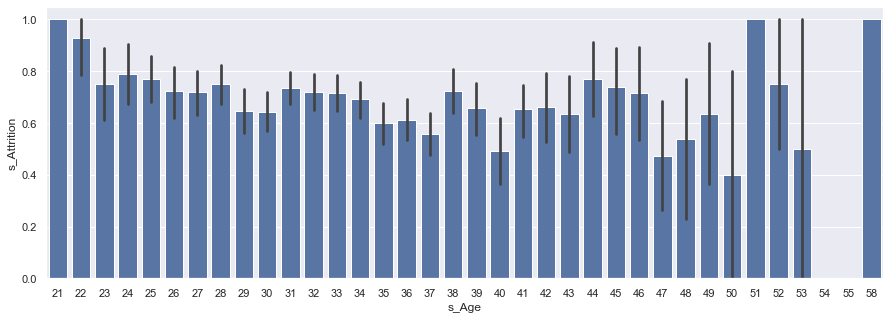

In [196]:
sns.set_color_codes("muted")
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=ed.s_Age, y=ed.s_Attrition, data=ed,
            label="Age-Attrition", color="b")

<AxesSubplot:xlabel='s_Age', ylabel='Count'>

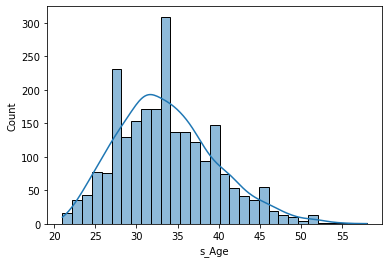

In [147]:
sns.histplot(ed.s_Age,kde=True)

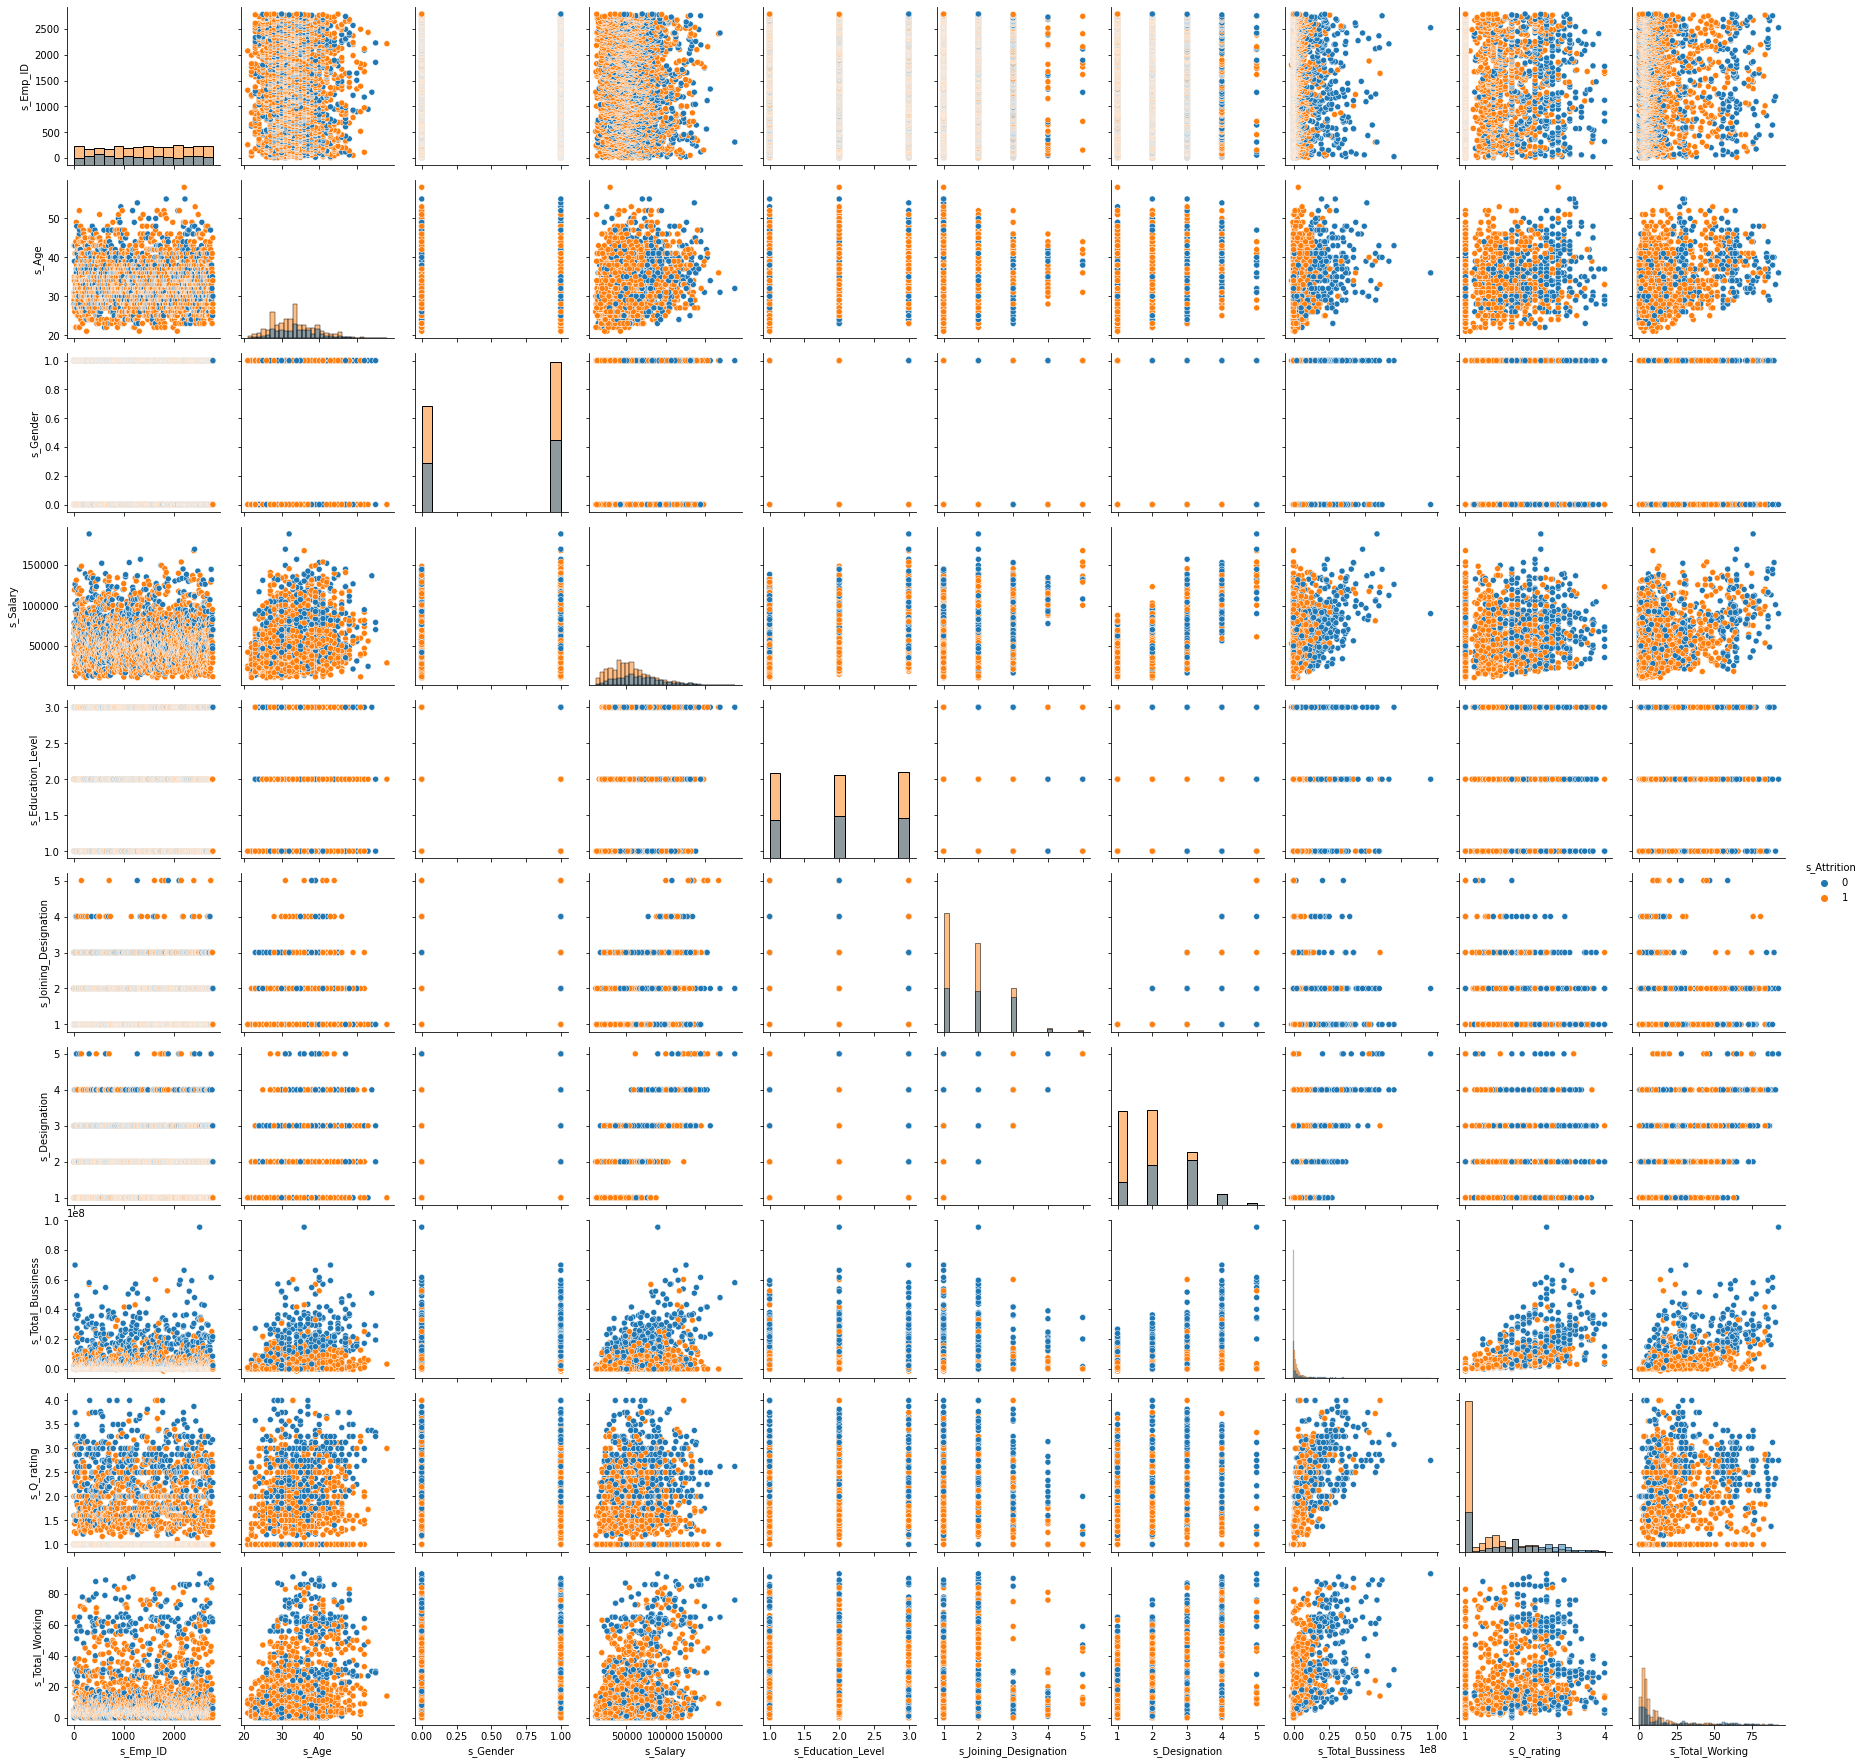

In [148]:
g = sns.PairGrid(ed, hue="s_Attrition")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [417]:
ed.to_csv('Employee_Attrition_Base_file_2.csv', index=False)

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sc = StandardScaler()

In [150]:
ed

,s_Emp_ID,s_Age,s_Gender,s_City,s_Salary,s_Education_Level,s_Joining_Designation,s_Designation,s_Total_Bussiness,s_Q_rating,s_Total_Working,s_Attrition
0,1,28,1,C23,57387.0,3,1,1,1715580,2.000000,2.0,1
1,2,31,1,C7,67016.0,3,2,2,0,1.000000,1.0,0
2,4,43,1,C13,65603.0,3,2,2,350000,1.000000,4.0,1
3,5,29,1,C9,46368.0,1,1,1,120360,1.000000,1.0,1
4,6,31,0,C11,78728.0,2,3,3,1265000,1.600000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,1,C24,82815.0,1,2,3,21748820,2.625000,62.0,0
2377,2785,34,0,C9,12105.0,1,1,1,0,1.000000,2.0,1
2378,2786,45,1,C19,35370.0,1,2,2,2815090,1.666667,13.0,1
2379,2787,28,0,C20,69498.0,3,1,1,977830,1.500000,11.0,1


# Feature Engineering

In [228]:
x = ed.drop(['s_Emp_ID','s_Education_Level','s_promotion','s_Attrition'],axis=1)

In [229]:
x

,s_Age,s_Gender,s_City,s_Salary,s_Joining_Designation,s_Designation,s_Total_Bussiness,s_Q_rating,s_Total_Working
0,28,1,C23,57387.0,1,1,1715580,2.000000,2.0
1,31,1,C7,67016.0,2,2,0,1.000000,1.0
2,43,1,C13,65603.0,2,2,350000,1.000000,4.0
3,29,1,C9,46368.0,1,1,120360,1.000000,1.0
4,31,0,C11,78728.0,3,3,1265000,1.600000,5.0
...,...,...,...,...,...,...,...,...,...
2376,34,1,C24,82815.0,2,3,21748820,2.625000,62.0
2377,34,0,C9,12105.0,1,1,0,1.000000,2.0
2378,45,1,C19,35370.0,2,2,2815090,1.666667,13.0
2379,28,0,C20,69498.0,1,1,977830,1.500000,11.0


In [230]:
x = pd.get_dummies(x)

In [231]:
X = sc.fit_transform(x)

In [232]:
y = ed['s_Attrition'].values

In [233]:
X_train,X_test,Y_train,Y_test =train_test_split(X,y,train_size=0.3,random_state=1)

In [264]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [235]:
clf1 = SVC(C=0.5)
clf2 = LogisticRegression()
clf4 = RandomForestClassifier()
clf5 = AdaBoostClassifier()
clf6 = RandomForestRegressor()
clf1_ = SVC(C=0.5)
clf2_ = LogisticRegression()
clf4_ = RandomForestClassifier()
clf5_ = AdaBoostClassifier()
clf6_ = RandomForestRegressor()

In [265]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [236]:
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
clf4.fit(X_train,Y_train)
clf5.fit(X_train,Y_train)
clf6.fit(X_train,Y_train)
# on Whole Data
clf1_.fit(X,y)
clf2_.fit(X,y)
clf4_.fit(X,y)
clf5_.fit(X,y)
clf6_.fit(X,y)

RandomForestRegressor()

In [282]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.671 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.636 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.636 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.664 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.685 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.706 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [300]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid_ = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid_.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.679 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.732 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.628 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.620 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.620 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.626 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.616 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.662 total time=   0.2s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.676 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.725 total time=   0.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.721 total time=   0.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [266]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [237]:
print('SVC :                     ',clf1.score(X_test,Y_test)*100,'%')
print('LogisticRegression :      ',clf2.score(X_test,Y_test)*100,'%')
print('RandomForestClassifier :  ',clf4.score(X_test,Y_test)*100,'%')
print('AdaBoostClassifier :      ',clf5.score(X_test,Y_test)*100,'%')
print('RandomForestClassifier :  ',clf6.score(X_test,Y_test)*100,'%')

SVC :                      74.62507498500301 %
LogisticRegression :       75.8248350329934 %
RandomForestClassifier :   76.48470305938812 %
AdaBoostClassifier :       76.18476304739052 %
RandomForestClassifier :   22.088943259324722 %


In [267]:
print('RandomForestClassifier With GridSCV :  ',CV_rfc.score(X_test,Y_test)*100,'%')

RandomForestClassifier With GridSCV :   76.30473905218956 %


In [283]:
print('SVM With GridSCV :  ',grid.score(X_test,Y_test)*100,'%')

SVM With GridSCV :   76.78464307138573 %


# Predicting the Test Data

In [301]:
emp_att = pd.DataFrame()

In [302]:
dt = pd.read_csv('test_hXY9mYw.csv')

In [303]:
emp_ = dt['Emp_ID'].values

In [304]:
join_df =[]
for i in emp_:
    join_df.append(ed[ed['s_Emp_ID'] == i])

In [305]:
emp_att = emp_att.append(join_df)

In [306]:
emp_att

,s_Emp_ID,s_Age,s_Gender,s_City,s_Salary,s_Education_Level,s_Joining_Designation,s_Designation,s_promotion,s_Total_Bussiness,s_Q_rating,s_Total_Working,s_Attrition
333,394,34,0,C20,97722.0,3,2,4,2,27458220,2.125,78.0,0
147,173,39,1,C28,56174.0,1,1,3,2,19866290,2.750,78.0,0
925,1090,39,1,C13,96750.0,1,2,4,2,50382490,2.750,78.0,0
716,840,40,0,C8,88813.0,1,1,4,3,17134040,1.500,77.0,0
257,308,32,1,C5,188418.0,3,2,5,3,58024490,2.625,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2134,40,1,C29,116006.0,1,2,5,3,59696450,2.875,86.0,0
1922,2255,40,1,C25,133489.0,1,3,4,1,36398090,2.625,85.0,0
380,448,37,1,C10,65389.0,2,2,4,2,30318780,2.125,80.0,0
1400,1644,48,0,C9,105513.0,2,2,4,2,28842760,2.125,80.0,0


In [307]:
emp_att.s_Total_Working = emp_att.s_Total_Working + 6 

In [308]:
x1 = emp_att.drop(['s_Emp_ID','s_Education_Level','s_promotion','s_Attrition'],axis=1)

In [309]:
x1 = pd.get_dummies(x1)
X1 = sc.transform(x1)

In [310]:
y_pred = grid_.predict(X1)

In [311]:
prediction = []
for i in range(len(emp_)):
    prediction.append({'Emp_ID': emp_[i],'Target':y_pred[i]})

In [312]:
p_df = pd.DataFrame(prediction)

In [313]:
p_df.to_csv('Final_Submission[Grid Seach CV SVM].csv', index=False)